In [1]:
# plot imu outputs

In [1]:
import matplotlib.pyplot as plt

C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Niell Lab\.conda\envs\DLC-GPU2\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import xarray as xr

In [32]:
ncpath = r'T:\freely_moving_ephys\ephys_recordings\061521\test_imu\test_imu\061521_test_imu_control_Rig2_test_imu_imu.nc'
imu_raw = xr.open_dataset(ncpath)

In [33]:
imu_data = imu_raw.copy()

In [34]:
earlysamps = int((30000/100)*30) # samples * sec
earlysamps

9000

In [41]:
imu_data = imu_data.isel(sample=slice(9000,-1))

In [42]:
imu_data

<xarray.Dataset>
Dimensions:   (channel: 8, sample: 14879)
Coordinates:
  * sample    (sample) float64 3.869e+04 3.869e+04 ... 3.874e+04 3.874e+04
  * channel   (channel) object 'acc_x' 'acc_y' 'acc_z' ... 'roll' 'pitch'
Data variables:
    IMU_data  (sample, channel) float64 ...

Text(0.5, 0, 'samples')

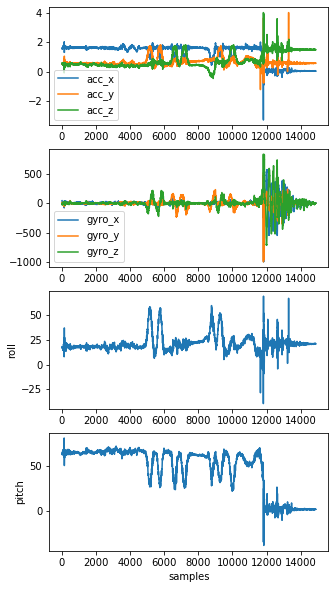

In [43]:
plt.subplots(4,1, figsize=(5,10))
plt.subplot(411)
for i in ['acc_x', 'acc_y', 'acc_z']:
    plt.plot(imu_data.to_array().sel(channel=i).T, label=i); plt.legend()
plt.subplot(412)
for i in ['gyro_x', 'gyro_y', 'gyro_z']:
    plt.plot(imu_data.to_array().sel(channel=i).T, label=i); plt.legend()
plt.subplot(413)
plt.plot(imu_data.to_array().sel(channel='roll').T)
plt.ylabel('roll')
plt.subplot(414)
plt.plot(imu_data.to_array().sel(channel='pitch').T)
plt.ylabel('pitch'); plt.xlabel('samples')